<a href="https://colab.research.google.com/github/Suraj-7077/Unsupervised-ML-Book-Recommendation-system-Model/blob/main/Unsupervised_ML_Capstone_Project_IV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



## **Project Type**    - EDA / Unsupervised ML / Recommendation System 
## **Project Title** - Book Recommendation System
## **Contribution**    - Individual

## **Contributor** - Suraj Shrikant Galande 

# **Project Summary -**

**During** **the** **last** **few** **decades**, **with** **the** **rise** of **Youtube**, **Amazon**, **Netflix**, **and** **many**
**other such web services**, **recommender systems have taken more and more place**
**in our lives**  . **From e-commerce** (**suggest to buyers articles that could interest them)** **to online advertisement (suggest to users the right contents, matching their preferences)**, **recommender systems are today unavoidable in our daily online journeys**.    

**In a very general way**, **recommender systems are algorithms aimed at suggesting**
**relevant items to users** **(items being movies to watch, text to read, products to buy, or anything else depending on industries)**. 

**Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors**. 

**The main objective of this project is to create a book recommendation system for users**.


# **GitHub Link -**

https://github.com/Suraj-7077/Unsupervised-ML-Book-Recommendation-system-Model.git

# **Problem Statement**


**In some industries, the use of recommender systems is crucial because, when we implemented it well, then they can be extremely profitable and set themselves apart from their competitors**. 

**Online book selling websites nowadays are competing with each other. One of the most effective strategies for increasing sales,enhancing customers experience and retaining customers is done by building an efficient Recommendation system.**

**The book recommendation system must recommend books that makes interests to buyers.** 

**Popularity based approach and Collaborative Filtering (CF) approach are used in this project to build book recommendation systems Model.**



# **Dataset Description**

Dataset used in this project is from Amazon Web services.

It Contains Three Datasets - 

1) Users Dataset :-  

Contains Features as           
                   
                    i) User-ID: A unique identification number for each user

                    ii) Location:It contains city,state and country to which the user belongs ,separated by commas

                    iii) Age:The age of the users 

2) Books Dataset :-  
Contains features as 

         i) SBN:International Standard Book Number unique to each edition of the book
        ii) Book-Title:Title of the book
        iii) Book-Author:Author of the book(incase of several authors only the first is provided)
        iv) Year-of-Publication:The year in which the particular edition of the book was published
        v) Publisher:Name of the Book Publishing company
        vi) Image-URL-S: URL link to a small version of the book cover displayed on the Amazon website
        vii) Image-URL-M: URL link to Medium version image of the book cover displayed on the Amazon website
       viii) Image-URL-L: URL link to Large sized image of the book cover displayed on the Amazon website 

3) Ratings Dataset :-  
Contains Features as 

           i)  User-ID:as mentioned above
           ii) ISBN:as mentioned above
           iii) Book-Rating: The rating given by the user (identified by User-ID) for the book (identified by ISBN). 
           It is either explicit,expressed on a scale from 1-10 (higher values denoting higher appreciation), 
           or implicit,expressed by 0 ( i.e. Lower appreciation).



# Importing libraries

In [ ]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Loading Datasets

In [ ]:
user_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Users.csv')

In [ ]:
book_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Books.csv')

In [ ]:
ratings_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Ratings.csv')

In [ ]:
user_df.head(4)              # Looking first 4 observations of user dataset

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0


In [ ]:
book_df.head(4)              # looking first 4 observations of books dataset

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [ ]:
ratings_df.head(4)          # looking first 4 rows of ratings datset

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3


In [ ]:
print(f' shape of users dataset = {user_df.shape},\n\n shape of books dataset = {book_df.shape},\n\n shape of ratings dataset = {ratings_df.shape}')

 shape of users dataset = (278858, 3),

 shape of books dataset = (271360, 8),

 shape of ratings dataset = (1149780, 3)


# 1) Users Data 

#  Preprocessing The Users data

In [ ]:
user_df.head(10)                  # first 10 observations of users dataset

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [ ]:
user_df.tail(10)                      # last 10 observations of users datset

,User-ID,Location,Age
278848,278849,"georgetown, ontario, canada",23.0
278849,278850,"sergnano, lombardia, italy",NaN
278850,278851,"dallas, texas, usa",33.0
278851,278852,"brisbane, queensland, australia",32.0
278852,278853,"stranraer, n/a, united kingdom",17.0
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [ ]:
user_df.shape

(278858, 3)

In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


There are 278858 number of observations(Rows) and 3 features (columns) in user 
datframe 

numerical features = 'User-ID' and 'Age' 

categorical feature = 'Location'

##  **Statistical summary of users dataset**

In [ ]:
user_df.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


This displays summary of statistics of dataframe

Information of different descriptive statistics :-

1) Measures of Frequency :- Count, Percent, Frequency.

2) Measures of Central Tendency :- Mean, Median, and Mode.

3)Measures of Dispersion or Variation or spread :- Range( max - min ),Variance, Standard Deviation.

4) Measures of Position :- Percentile Ranks, Quartile Ranks.

## Checking null values in users dataset 

In [ ]:
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

As we see that Age column has 110762 null values presents.

In [ ]:
print(user_df.isnull().sum()/ len(user_df)*100)

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


So as almost 40% of age data is missing. but age feature is important regarding exploring dataset, otherwise we have droped this feature.

In [ ]:
user_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

As we see that maximum age of user is 244 which is definitely an outlier.

## Checking distribution of age column 

<Axes: xlabel='Age', ylabel='Count'>

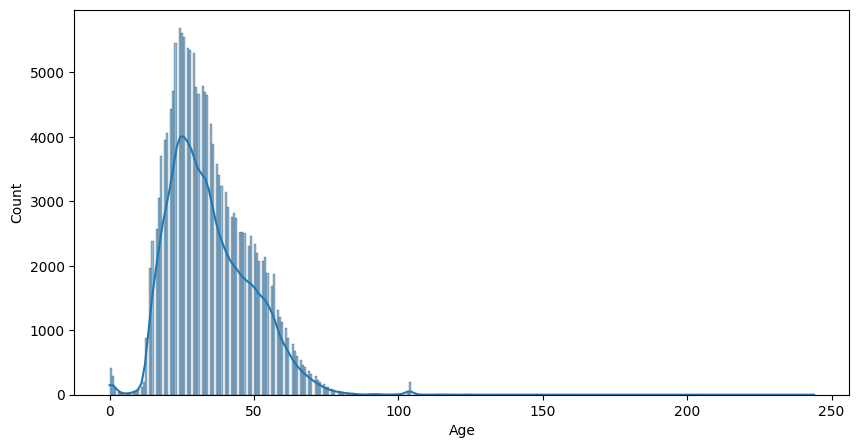

In [ ]:
fig = plt.figure(figsize = (10,5))
sns.histplot(user_df['Age'], kde=True)

As we see that distribution of Age feature in users data is slightly positively skewed. 

We can say that it is unlikely to have users of age above 95 years and below age of 5. 

## Lets plot boxplot for age to check outliers

<Axes: xlabel='Age'>

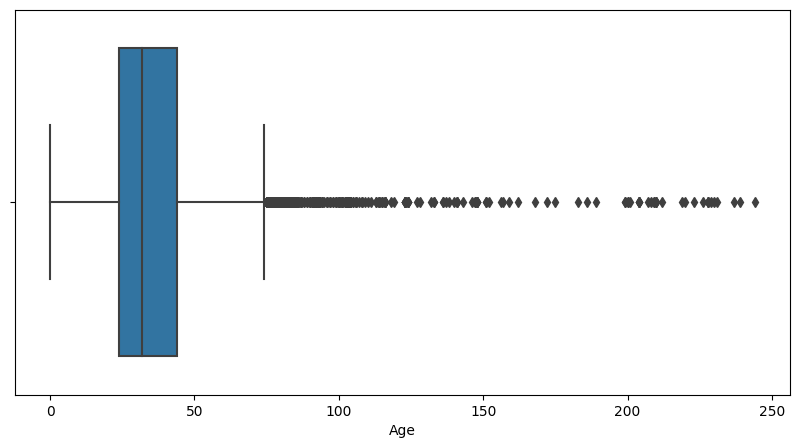

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x= 'Age', data= user_df)

As we say that most of the users are from age group of 25-50 years old.

And we see that above age of 100 there are some outliers present.

## Removing outliers from age columns and filling it with null values.

Becoz above 100 years of age and below 5 years of age, dont think so there are users who reads books so we dont need of these observations.

In [ ]:
# Replacing outliers with Nan values

user_df.loc[(user_df['Age'] > 100) | (user_df['Age'] < 5), 'Age'] = np.nan

Now see final total number of missing values in age column after removing outliers. 

In [ ]:
print('number of missing values after imputing outliers with nan ', user_df['Age'].isnull().sum())

number of missing values after imputing outliers with nan  112010


In [ ]:
user_df['Age'].describe()

count    166848.000000
mean         34.746638
std          13.633051
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

Now its looking good as maximum age of user is 100 year old and minimum age of user is 5 years old.

## Treating null values 

Since Age column is numerical datatype feature so we will fill missing values by there mean.

In [ ]:
print('Missing values in Age feature before imputation',user_df['Age'].isnull().sum())

user_df.fillna(user_df['Age'].mean(), inplace=True)

print('Missing Values in Age column after imputation ', user_df['Age'].isnull().sum())

Missing values in Age feature before imputation 112010
Missing Values in Age column after imputation  0


In [ ]:
user_df.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

So in user data we dont have any missing values present

## Now perfoming feature engineering on user data

Since creating Age group column of users based on there Ages 

And extracting country name from location column to make better understanding of userdata.

In [ ]:
# Defining function 

def Age_group(age) :
  '''
  defines age group of users based on there year
  '''

  if age < 13 :
    x = 'childs'
  elif age >=13 and age < 20:
    x= 'teens'
  elif age >=20 and age <35 :
    x = 'youth'
  elif age >=35 and age < 55:
    x = 'adults'
  else :
    x= 'olds'
  
  return x

In [ ]:
# applying function 
# Creating Age_group column
user_df['Age_group'] = user_df['Age'].apply(lambda x : Age_group(x))

In [ ]:
user_df.head()

,User-ID,Location,Age,Age_group
0,1,"nyc, new york, usa",34.746638,youth
1,2,"stockton, california, usa",18.000000,teens
2,3,"moscow, yukon territory, russia",34.746638,youth
3,4,"porto, v.n.gaia, portugal",17.000000,teens
4,5,"farnborough, hants, united kingdom",34.746638,youth


Thus we have successfully created age group column for better understanding of users.

Now extracting country name from location column

In [ ]:
user_df['Location'].nunique()

57339

57339 Number of unique values of locations present in our user data

In [ ]:
for i in user_df : 
  user_df['Country'] = user_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
user_df.head()

,User-ID,Location,Age,Age_group,Country
0,1,"nyc, new york, usa",34.746638,youth,usa
1,2,"stockton, california, usa",18.000000,teens,usa
2,3,"moscow, yukon territory, russia",34.746638,youth,russia
3,4,"porto, v.n.gaia, portugal",17.000000,teens,portugal
4,5,"farnborough, hants, united kingdom",34.746638,youth,united kingdom


In [ ]:
#Dropping the 'Location' column becoz we dont need it now 
user_df.drop('Location',axis=1,inplace=True)

In [ ]:
user_df.head(2)

,User-ID,Age,Age_group,Country
0,1,34.746638,youth,usa
1,2,18.000000,teens,usa


In [ ]:
# creating set of countries name 

set(user_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [ ]:
len(set(user_df['Country']))

530

Since By ctreating Set, we say that there are total 530 unique countries presents ( since Set only contains unique values does not conatins duplicate values). 

But there are some country names which are not correctly spelled, so we have to make them correct for better analysis.

In [ ]:
# correcting mispelled words
user_df.loc[user_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'

user_df.loc[user_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'

user_df.loc[user_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'

user_df.loc[user_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'

user_df.loc[user_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'

user_df.loc[user_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'

user_df.loc[user_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'

user_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 

In [ ]:
#  Converting country names to uppercase 

user_df['Country']=user_df['Country'].str.upper()

In [ ]:
user_df['Country'].value_counts()

USA           139746
CANADA         21658
UK             18565
GERMANY        17074
SPAIN          13258
               ...  
ALACHUA            1
CHINA ÖÐ¹Ú         1
MAROC              1
MÉRIDA             1
HERNANDO           1
Name: Country, Length: 473, dtype: int64

In [ ]:
user_df['Country'].nunique()

473

So finally we say that we have total 473 countries user data.

And out of them USA has most number of users, then followed by CANADA , UK and so on ...

So up till now we have analysed and cleaned our users data 

Now its time to look for Books dataset.

# 2) Book Data



# Preprocessing The Book Data

In [ ]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
book_df.shape

(271360, 8)

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Since All the features in book data are of object data type 

and there are some null values presents

In [ ]:
book_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


## Handling Missing values in book dataset

In [ ]:
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

We see that there are very less missing observation. so if we drop them it wont affectt our analysis so we will drop them. 

In [ ]:
book_df.dropna(inplace=True)

In [ ]:
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Now we dont have any missing values in book data.

Now since year of publication feature is actually numerical datatype. 

## So performing feature engineering on year of publication column.

 changing dtype of year of publication

In [ ]:
book_df['Year-Of-Publication'] =book_df['Year-Of-Publication'].astype(int)

In [ ]:
book_df['Year-Of-Publication'].value_counts()

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
        ...  
1910        1
1934        1
1914        1
1904        1
2037        1
Name: Year-Of-Publication, Length: 116, dtype: int64

<Axes: xlabel='Year-Of-Publication', ylabel='Density'>

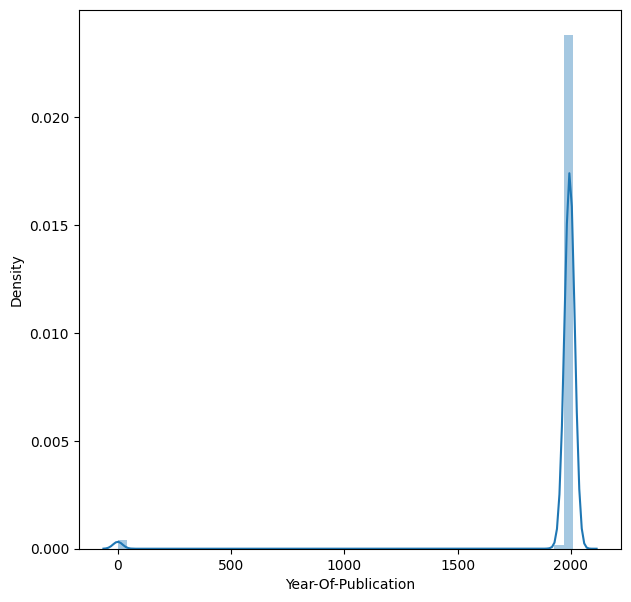

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(book_df['Year-Of-Publication'])

<Axes: xlabel='Year-Of-Publication'>

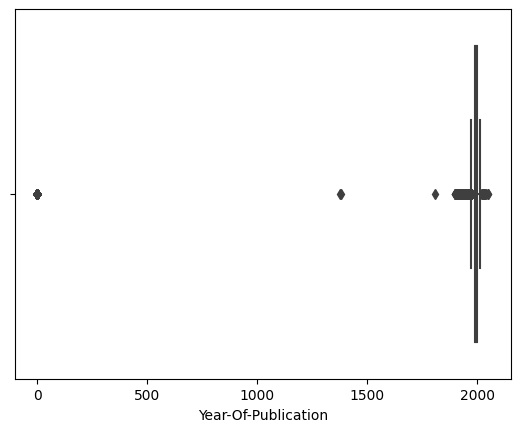

In [ ]:
sns.boxplot(x='Year-Of-Publication', data= book_df)

As we see that most of the Book data is present between 1800 to 2023 years.

and there are some outliers also present. i.e. there are some book publications year date mentioned in dataset as 2037, 2024, 2030 etc which are future years publications years so we dont know whether these books will be published or not so we will fill them by nan values and then replace these observations by there median. 

We taking only year of publications data from 0 years to present year i.e. 2023 and other years data filling with nan 

In [ ]:
book_df.loc[(book_df['Year-Of-Publication'] > 2023) | (book_df['Year-Of-Publication']==0), 'Year-Of-Publication']= np.nan

In [ ]:
book_df['Year-Of-Publication'].describe()

count    266723.000000
mean       1993.687770
std           8.321219
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

In [ ]:
# so replacing null values by median for year of publication column 
print('missing values in year of publications before imputing ', book_df['Year-Of-Publication'].isnull().sum())
book_df['Year-Of-Publication'].fillna(int(book_df['Year-Of-Publication'].median()), inplace=True)
print('missing values in year of publication after imputing ', book_df['Year-Of-Publication'].isnull().sum())

missing values in year of publications before imputing  4631
missing values in year of publication after imputing  0


In [ ]:
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

## Now looking for other features of book dataset 

In [ ]:
# checking value counts of book author
book_df['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102020, dtype: int64

So we see that in our book dataset we have writer name as Agatha Christie has most number of books as 632 number of books, and then followed by author William Shakespeare has 567 value counts of books 

In [ ]:
book_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


Droping Image-URL columns bcoz these are visited urls of users, it changes with user, so we will drop them for simplicity.

In [ ]:
book_df.drop(columns=['Image-URL-S',	'Image-URL-M','Image-URL-L'], inplace=True)

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271354 non-null  object 
 1   Book-Title           271354 non-null  object 
 2   Book-Author          271354 non-null  object 
 3   Year-Of-Publication  271354 non-null  float64
 4   Publisher            271354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


So we have cleaned our book dataset 

Now its time to look for Ratings dataset

# 3) Ratings Dataset

# Preprocessing the Ratings data

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Since in ratings data no any missing observations presents

Checking unique user id and ISBN values

In [ ]:
print('number of users with unique user id ', ratings_df['User-ID'].nunique())
print('\n')
print('number of unique book ISBN value ', ratings_df['ISBN'].nunique())

number of users with unique user id  105283


number of unique book ISBN value  340556


So from above we see that many users are buying multiple books. 

Also some books are really famous and hence these books are bought by multiple users. 

Since as we see that ISBN column are common in both ratings data and books dataframe.

so lets create a new ratings dataframe on the basis of ISBN value common in ratings and book dataset.

In [ ]:
ratings_df_new = ratings_df[ratings_df['ISBN'].isin(book_df['ISBN'])]

In [ ]:
print('ratings datframe shape ',ratings_df.shape)
print('ratings datframe which are having common ISBN value betwn Book dataframe ', ratings_df_new.shape)

ratings datframe shape  (1149780, 3)
ratings datframe which are having common ISBN value betwn Book dataframe  (1031129, 3)


In [ ]:
# Value counts of book ratings

ratings_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,647291
1,8,91803
2,10,71225
3,7,66401
4,9,60776
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


As we see that 0 as implicit ratings (does not clearly described or ratings count) and it has value counts as 647291 number of total book rarings given by users.

And we say explicit ratings as which is not 0.user given 8 as rating to book has  91803 nuber of books ratings. 

i.e. We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10

## Finding popular book based on ratings

Checking Top 20 books which recived highest ratings count.

In [ ]:
ratings_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by= 'Book-Rating', ascending= False)[:20]

,ISBN,Book-Rating
215950,0971880107,2502
38570,0316666343,1295
70798,0385504209,883
7344,0060928336,732
32370,0312195516,723
87397,044023722X,647
21342,0142001740,615
145042,067976402X,614
133142,0671027360,586
93847,0446672211,585


As we see that 215950 users has given highest number of book ratings (i.e. 2502) for book ISBN number - 0971880107

But here we have both combined explicit and implicit ratings

So we have to separate explicit and implicit ratings of books.

Creatings separate dataframe for Explicit and implicit ratings based on book ratings given by users.

In [ ]:
explicit_ratings = ratings_df_new[ratings_df_new['Book-Rating'] !=0]

implicit_ratings = ratings_df_new[ratings_df_new['Book-Rating'] ==0]

In [ ]:
explicit_ratings.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
implicit_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0


In [ ]:
print('shape of explicit ratings ', explicit_ratings.shape, '\n', 'shape of implict ratings ', implicit_ratings.shape)

shape of explicit ratings  (383838, 3) 
 shape of implict ratings  (647291, 3)


We see that most of the observation in our rating dataset have implicit ratings(0) for books. 

## Now che checking top 20 most popular explicitly rated books

In [ ]:
explicit_ratings.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending= False)[:20]

,ISBN,Book-Rating
21945,0316666343,707
117744,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320
68898,059035342X,313
12325,0142001740,307
51799,0446672211,295
47986,044023722X,281
57625,0452282152,278


## Gettings Book names of these top 5 most popular rated books by ther ISBN number from our book dataframe.

In [ ]:
ISBN_numbers = ['0316666343', '0971880107','0385504209	', '0312195516','0060928336']
book_df[book_df['ISBN'].isin(ISBN_numbers)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


So 21945 Users have given Most explicit ratings (707 number of book ratings) counts for book title = The Lovely Bones: A Novel which has ISBN number 0316666343, which is written by Alice Sebold published in 2002.

Thus we say that The Lovely Bones: A Novel is most popular book as based on ratings.

So up till now we have analysed and cleaned our three datasets.

### Now we will merge them for further exploration and building recommendation of books model. 

# Merging Datasets

Note here we only taking Explicit ratings datframe bcoz implicit ratings datfame will not give any information, regarding explore and bulid model...

Since ISBN named column is same in both book and explicit ratigs datset so joining them from inner side.

In [ ]:
df_of_book_and_ratings = pd.merge(book_df, explicit_ratings, on='ISBN', how= 'inner')

In [ ]:
df_of_book_and_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


Now Merging df_of_book_and_ratings with users dataframe.

Since User_ID is common column between them so joining them on inner side. 

In [ ]:
final_df = pd.merge(df_of_book_and_ratings,user_df, on='User-ID', how='inner')

In [ ]:
final_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,34.746638,youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8,5,34.746638,youth,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8,5,34.746638,youth,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8,5,34.746638,youth,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8,6,34.746638,youth,CANADA


So this is our final datframe for further exploration.

In [ ]:
final_df.shape

(383838, 10)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383838 entries, 0 to 383837
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383838 non-null  object 
 1   Book-Title           383838 non-null  object 
 2   Book-Author          383838 non-null  object 
 3   Year-Of-Publication  383838 non-null  float64
 4   Publisher            383838 non-null  object 
 5   User-ID              383838 non-null  int64  
 6   Book-Rating          383838 non-null  int64  
 7   Age                  383838 non-null  float64
 8   Age_group            383838 non-null  object 
 9   Country              383838 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.2+ MB


So now we have 383838 number of observations and 10 features to use for further building project.

# Now Doing Some EDA on Final Dataframe.

## lets check Frequently ratings given by users

Text(0.5, 1.0, 'most popular ratings given by users')

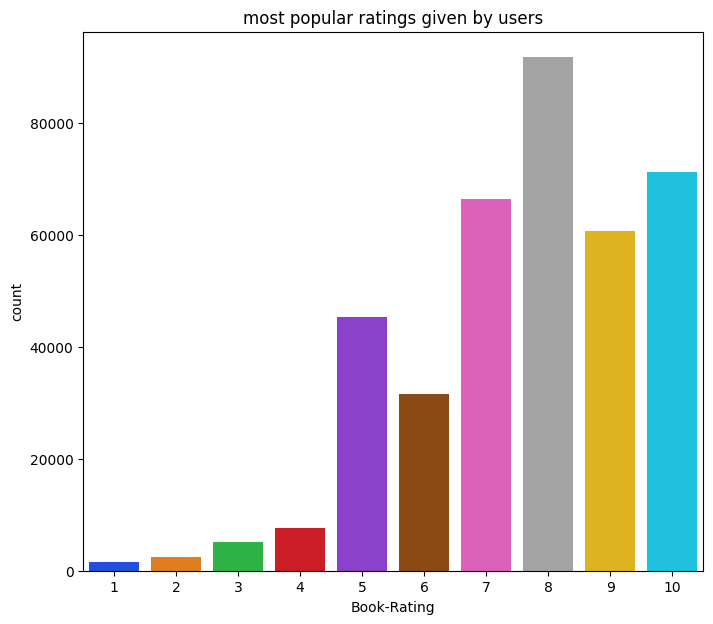

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(data=final_df, x='Book-Rating', palette='bright')
plt.title('most popular ratings given by users')

As we see that Most of the users given rating = 8 for books 

And most of the user in our dataset has given ratings between  4 to 10.

## Checking Top 10 popular books based on ratings

In [ ]:
popular_books_df.columns

Index(['Book-Title', 'Book-Rating'], dtype='object')

Text(0.5, 1.0, 'top 10 most popular books based on ratings')

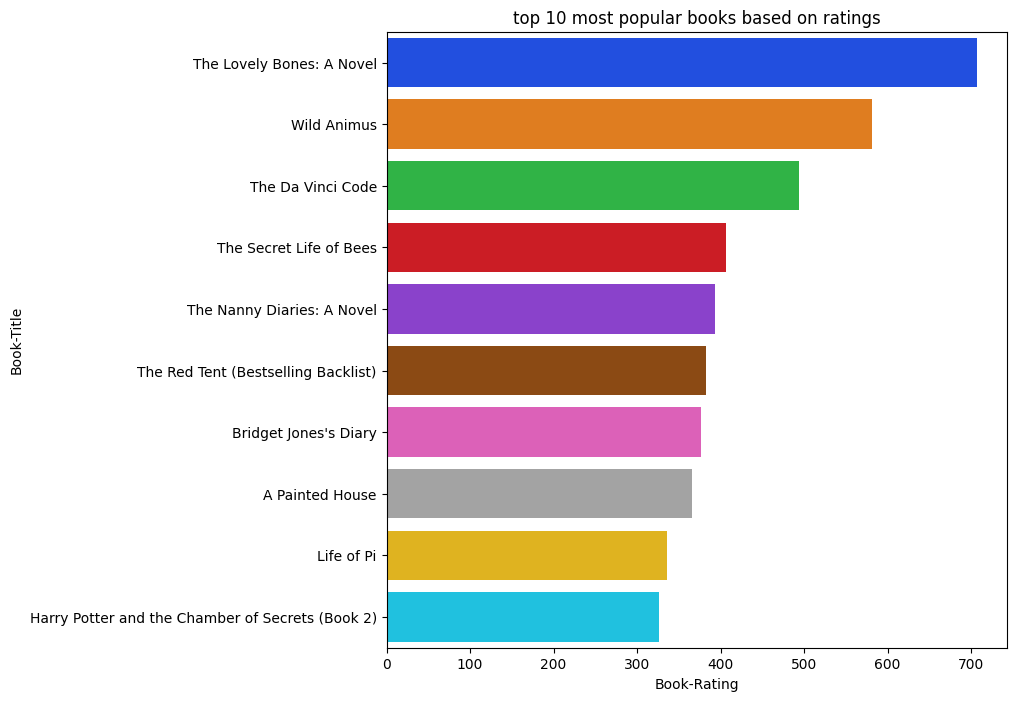

In [ ]:
# creating dataframe for book title and book ratings
popular_books_df = final_df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

plt.figure(figsize=(8,8))
sns.barplot(data= popular_books_df, y= 'Book-Title', x= 'Book-Rating', palette = 'bright')
plt.title('top 10 most popular books based on ratings')

As We have already  seen that  book which has been rated by most number of users is  'The Lovely Bones'

## Now Finding most popular book author